In [166]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# auto reload 
를 실행하게 되면, 
쥬피터를 미리 실행 한 상황에서, 나중에 새로운 라이브러리를 설치를 해도, 
자동적으로 불러오게 되는 것이다. 

# matplotlib inline
모든 차트가 쥬피터 노트북 안에서 볼 수 있게 해주는 것이다. 
이것을 지정해 주지 않게 되면, 이미지들이 파일로 따로 저장되게 하는 것이다. 


# 자동 리로드를 설정하고
autoreload 2 는 보통 이런식으로 뽑아낸다고 한다.
matplotlib inline 을 하게 되면 주피터 노트북에서 이미지를 보는 것이 가능하게 되는 것이다. 

# 초기 설정 들이다
import numpy, pandas, seaborn 을 통해서 numpy,pandas 뽑아 내고 
seaborn 은 그래프 이쁘게 그리기 위해서 사용하는 것이고.
matplotlib 도 그래프를 이쁘게 뽑아 내 주는 것이다. 

In [167]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

# Default 설정
단순하게 그림 스타일과 , 어떻게 표현을 할지에 대해서 설명하는 부분이다. 



In [168]:
#default 설정
rcParams['figure.figsize'] = (16, 8)
    #이미지 크기 설정
plt.style.use('fivethirtyeight')
    #그림스타일 (기본스타일은 구림. 이건 이쁨)
pd.set_option('max_columns', 100)
    #한번에 보여주는 column 개수
pd.set_option("display.precision", 4)
    #소수점 자리수 설정
warnings.simplefilter('ignore')
    #모든 경고 무시

# 데이터 다운로드

In [169]:
!ls -alF ./Dacon/
    #저장한 폴더 속성보기 (터미널 명령어 실행 시 앞에 !)

total 449800
drwxr-xr-x  7 jae-wook.lee  staff        224 Sep 11 01:53 ./
drwxr-xr-x  8 jae-wook.lee  staff        256 Sep 11 01:59 ../
-rw-r--r--@ 1 jae-wook.lee  staff       6148 Sep 10 14:33 .DS_Store
-rw-r--r--  1 jae-wook.lee  staff  118789996 Sep 11 01:53 feature.csv
-rw-r--r--@ 1 jae-wook.lee  staff     800010 Jul 26 04:35 sample_submission.csv
-rw-r--r--@ 1 jae-wook.lee  staff   18936246 Jul 26 04:35 test.csv
-rw-r--r--@ 1 jae-wook.lee  staff   76278443 Jul 26 04:35 train.csv


# train.csv, test.csv 
파일들의 경로를 찾아서 trn_file, tst_file 변수에 넣어 준 것이다. 
# seed =42
라는 것은 뒤에, data sampling 하는 것이 있는데 random 이랑 관련 있는 것 같다. 

In [170]:
data_dir = Path('./Dacon/')
    #input폴더 경로 설정
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
    #파일 경로를 변수로 설정 후 feature_file을 feature.csv로 저장
seed = 42
    #데이터 샘플 시 랜덤 seed 설정

# EDA



# 학습 데이터 로드 
# index_col=0 
을 통해서 id 가 0 부터 시작 하게 만드는 것이다. 
# trn.shape 
을 통해서 (320000,19) 가 뜨는 것.


In [171]:
#######학습 데이터 로드 ########

trn =pd.read_csv(trn_file, index_col= 0)
    #파일을 불러오고 index column 설정. (난 0 을 시작 index 로 하겠다.)
print(trn.shape)
    #데이터 프레임 출력

(320000, 19)


# Trn.head() , Trn.tail()
초반 5 줄을 보여주게 되고, 
후반 5 줄을 보여주게 되는 것이다. 

In [172]:
trn.head()
    #frame 의 행을 보여줌, trn.head(행의 갯수)

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


In [173]:
trn.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
319995,18.3656,17.2409,16.7739,16.4850,16.3404,5.1988e-02,18.1328,17.0406,16.6374,16.3861,16.2874,2,2,1.0930,1.0888,1.0973,1.0951,1.0909,2
319996,18.6856,17.6658,17.1904,16.8169,16.6367,8.7261e-02,18.5207,17.5131,17.0871,16.7436,16.6017,2,2,1.0517,1.0508,1.0526,1.0522,1.0513,1
319997,21.1890,18.4234,17.2956,16.9011,16.6841,-1.0148e-05,20.9890,18.3076,17.2152,16.8403,16.6355,31,30,1.1933,1.1941,1.1925,1.1929,1.1937,0
319998,18.8472,17.3186,16.5057,16.1806,15.9116,-4.5209e-05,16.3900,15.4058,15.1823,15.1969,15.1793,1,1,1.1725,1.1726,1.1725,1.1725,1.1725,0
319999,19.8604,18.8199,18.5156,18.4149,18.3080,-9.6544e-04,19.8256,18.7819,18.4908,18.3987,18.3098,1,1,1.0571,1.0562,1.0580,1.0575,1.0567,0


# Trn.describe() 
데이터셋의 전반적인 개요에 대해서 보여주게 되는 것. 
ex) U 칼럼 의 갯수는 320000 이고,
mean 은 19.8
standard deviation : 1.9455
min, max
전체의 25% 를 차이하는 값, 50 % 차지 하는 값, 75% 차지하는 값. 

In [174]:
trn.describe()


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,19.8524,18.3768,17.7358,17.1742,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,6.3327,6.1388,1.1758,1.1765,1.1751,1.1754,1.1761,1.1163
std,1.9455,31.1108,1.4662,52.5615,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,8.8811,8.5516,0.1163,0.1181,0.1147,0.1155,0.1172,0.9235
min,-17.6875,-17555.3656,7.7314,-23955.8178,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,1.0000,1.0000,1.0001,1.0000,1.0002,1.0001,1.0000,0.0000
25%,18.7242,17.4749,16.8772,16.5239,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,1.0000,1.0000,1.0882,1.0884,1.0878,1.0880,1.0883,0.0000
50%,19.4194,18.1405,17.5258,17.1497,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,2.0000,2.0000,1.1793,1.1792,1.1794,1.1794,1.1793,1.0000
75%,20.4321,19.0732,18.4281,18.0074,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,5.0000,5.0000,1.2275,1.2260,1.2292,1.2286,1.2268,2.0000
max,58.6233,46.3383,72.0097,50.1641,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,44.0000,42.0000,2.0508,2.0803,2.0221,2.0363,2.0654,2.0000


# Trn.dtypes
UGRIZ 와 같은 칼럼은 float 을 갖고 있고, 
nobserve, detect 는 int 인 data type 을 갖고 있고
이런것을 확인 할수 있는 것이다.  

In [175]:
trn.dtypes

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

# #종속 변수들의 분포##
# 타겟 레이블을 예측 해야된다. 이를 위해서 분포 정로를 확인하는 과정. 
sort 는 정렬 해 놓는 것
hist 는 간단히 만드는 것이다. 
상세값은 파악하는게 불가능하다. 

# value_count .sort_index()
를 통해서 특정 value 가 얼만큼 나왔는지 확인을 할 수 있게 되는 것이다. 
원래는 그대로 하면 제일 많이 나오는 숫자 부터 순서 대로 깔리게 되는데, 
sort_index 를 통해서 index 순서 대로 깔리게 된다. 

In [176]:
trn['class'].value_counts().sort_index()

0    119996
1     42785
2    157219
Name: class, dtype: int64

# trn[내가 사용하고 싶은 column].hist()
를 통해서 histogram 을 간단하게 작성할 수 있게 된다. 

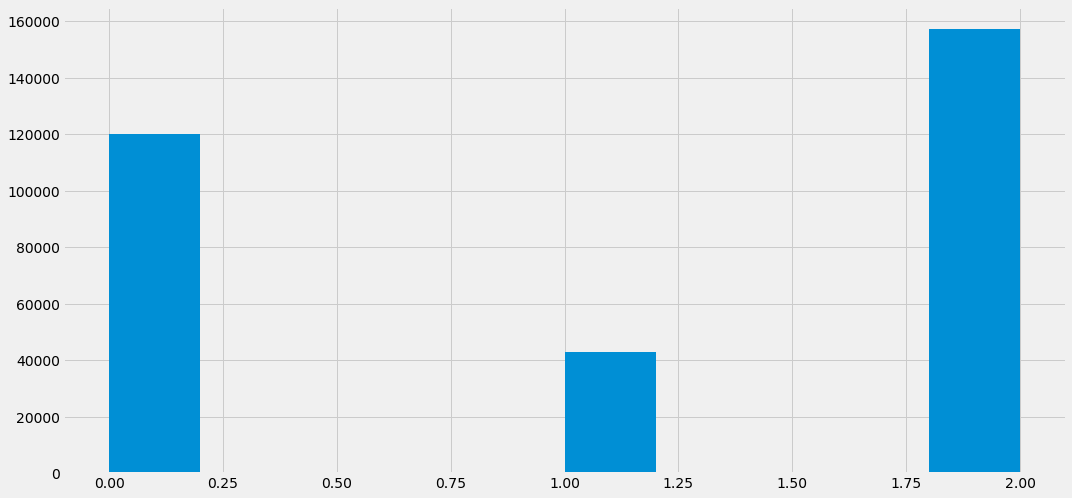

In [177]:
trn['class'].hist()

# #독립 변수들의 분포##

#  trn['i'].hist(bins=100)
i 라는 column  의 분포 정도를 확인하는 것이다. Bin 갯수, 버캣 갯수를 설정하는 것이다.. 뭔소리인지..?

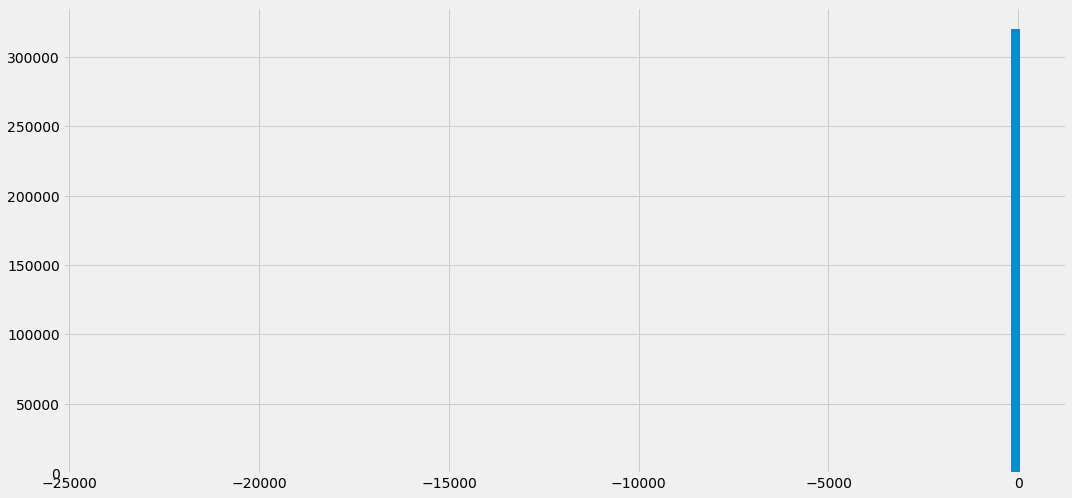

In [178]:
trn['i'].hist(bins=100)
    #column i 의 분포 정도를 확인 (bins = 버캣 갯수 설정 : 난 100개를 보내겠다.)
    

# quantile(np.arange(0,1, .01)
percentage 분포를 보고 싶을 때 quantile 을 사용하는 것이다. 
뒤에 np.aragne( 0 , 1, 0.01)
0~1 사이를 0.01 단위로 percentage 를 보여준다.  
ex)  0.0 0.01 0.02 0.03 0.04 0.05 ......0.99 1.00

# i 라는 column에서 값이 적은 것부터 최대 까지 나열. 
최저 1% 값이 14.4575 최저 2%  값이 14.8731 .....  이렇게 되는 것이다. 
이때 최저 값은 -23955 뭐 이렇게 되는 것이다. 
그런데 얼마나 많은 값들이 음수 값을 갖게 되는 것인가???

In [179]:
trn['i'].quantile(np.arange(0,1, .01))

0.00   -23955.8178
0.01       14.4575
0.02       14.8731
0.03       15.0952
0.04       15.2494
           ...    
0.95       19.6769
0.96       19.8682
0.97       20.0562
0.98       20.2517
0.99       20.6046
Name: i, Length: 100, dtype: float64

In [180]:
np.arange(0,1, .01)[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

# 0.00에서는 최저값이 음수이다. 
그럼 얼마나 많은 값들이 음수 값을 갖고 있는지 확인을 해 보자. 
# trn.loc[trn['i'] <0]
i 의 값에서 음수의 값을 다 들고 오고 싶다! 
train 에서 i 의 칼럼 중에서 음수인 것을 다 뽑아 내는 방법을 알려준 것이다. 

In [181]:
trn.loc[trn['i'] <0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,0.0671,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
134102,18.0590,19.3009,19.0443,-5.4550,13.4289,0.0349,18.0384,19.4843,19.3937,23.6095,24.1169,1,1,1.0693,1.0710,1.0678,1.0685,1.0701,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,0.0932,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
181371,14.6680,14.0357,13.7587,-23.9024,13.5329,0.0007,14.5893,13.9768,13.7133,24.4559,13.5264,2,2,1.2933,1.2867,1.3000,1.2966,1.2900,1


# i column 과 연관 되 column 은 dered_i 
얘도 분포를 한번 확인해 보자. 

# #박사님이 여기서 i 랑 dered_i 가 비슷하다고 했다. 왜?
음수 값이 최저값이긴 해도, 
1%~99% 의 값이 양수이고, quantile 한 값들도 거의 비슷하게 나오고 있는 상황이다. 

In [182]:
trn['dered_i'].quantile(np.arange(0,1, .01))

0.00   -9999.0000
0.01      14.1238
0.02      14.6338
0.03      14.9256
0.04      15.1070
          ...    
0.95      19.6019
0.96      19.7939
0.97      19.9848
0.98      20.1736
0.99      20.5396
Name: dered_i, Length: 100, dtype: float64

# i 가 음수인 것은 4 개였는데
# dered_i 음수 인것은 7 인 상황이다. 

In [183]:
trn.loc[trn['dered_i']<0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
75409,24.0610,23.8879,20.5890,18.1014,16.4314,1.6993e-04,-30.6337,-18.6560,-8.7560,-3.6973,0.2159,11,8,1.1858,1.1859,1.1859,1.1858,1.1858,0
107428,19.3774,18.2789,17.9404,-23955.8178,-23955.8178,6.7144e-02,19.1142,18.1270,17.8280,-9999.0000,-9999.0000,5,4,1.3060,1.3121,1.3002,1.3031,1.3090,2
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,9.3168e-02,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
203328,19.1628,17.7936,16.2919,15.1547,14.2541,2.1426e-04,-35.8185,-25.0458,-13.3443,-6.8683,-2.1271,10,9,1.2710,1.2660,1.2762,1.2735,1.2685,0
218728,22.2886,19.7721,17.6775,16.3672,15.1206,1.6016e-04,-41.0768,-29.4654,-16.3802,-8.9412,-3.7059,6,4,1.1851,1.1852,1.1852,1.1851,1.1852,0
294574,22.7283,20.9049,19.4225,17.8771,17.0411,-7.0816e-06,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0
295627,23.5286,20.9588,19.4514,17.8901,17.0632,-2.0197e-05,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0


# 이렇게 했듯이 pandas 에서 제공 한 것을 이용해서 
# 특정 조건을 만족하는 sample 을 추출해서 보거나, 삭제 하거나 그런 것을 할 수 있다.!!!!

# 3.5 시각화 
data 를 eda 할때 사람들이 제일 많이 하는 것은 시각화 이다. 
시각화를 하게 되면, 패턴을 쉽게 쉽게 파악 할수 있게 된다.
but 32 만개의 data 를 한번에 시각화 하게 되면 좀 오래걸리거나, 사람이 판독하기가 좀 불편하게 된다. 그래서 시각화 할대는 
sampling 을 통해서 좀 간략하게 만들어서 진행하게 된다. 


# trn_sample=trn.sample(n=10000, random_state=seed)
나는 sampling 을 10000개만 하겠다.!
sampling 은 랜덤 하게 진행이 되는데, 어느정도 제연 가능하게 하기 위해서 
seed 값을 주게 되는데, 이 시드 값을 어느 정도 고정을 시켜 놓고 
진행하게 되는 것이다. 

In [184]:
trn_sample=trn.sample(n=10000, random_state=seed)

# sns.pairplot(data = trn_sample, vars = ['u', 'g', 'r', 'i', 'z'], hue = 'class', size = 5)

seaborn 의 함수이다. 
URGIZ 5개의 칼럼을 두고, hue=class(종속변수) 를 갖고 
상관 관계를 나타낸 것이다. 
x 축은 ugriz 칼럼이고
y 축도 ugriz 칼럼이다.
대각선들은 값의 분포를 보여주는 것이다. class 값에 따라서 다른 선으로 보여주는 것이다. 
파란색 : class =0. 빨간 class =1 노랑 : class =2
# 분포가 다르면 다를수록, 그 변수가 class 를 예측하기 편하다. 
예를 들면 [u,u] 위치에 있는 것을 보면 class 가 0 인놈이 1,2 보다 구분하기가 쉽겠구나. 를 알 수 있게 디는 것이다. 
[u,z] 를 보면 대충 양의 상관 관계를 볼 수 있다. 단 class 0 일 때는 약간 차이가 있을 수도 있다. 
[g,z] 를 볼때도 확인 을 할 수 있게 된다. 
 
 # 눈으로 딱 봤을 때 특이한 점을 확인할 수 있어서 굉장히 좋은 것이다. 

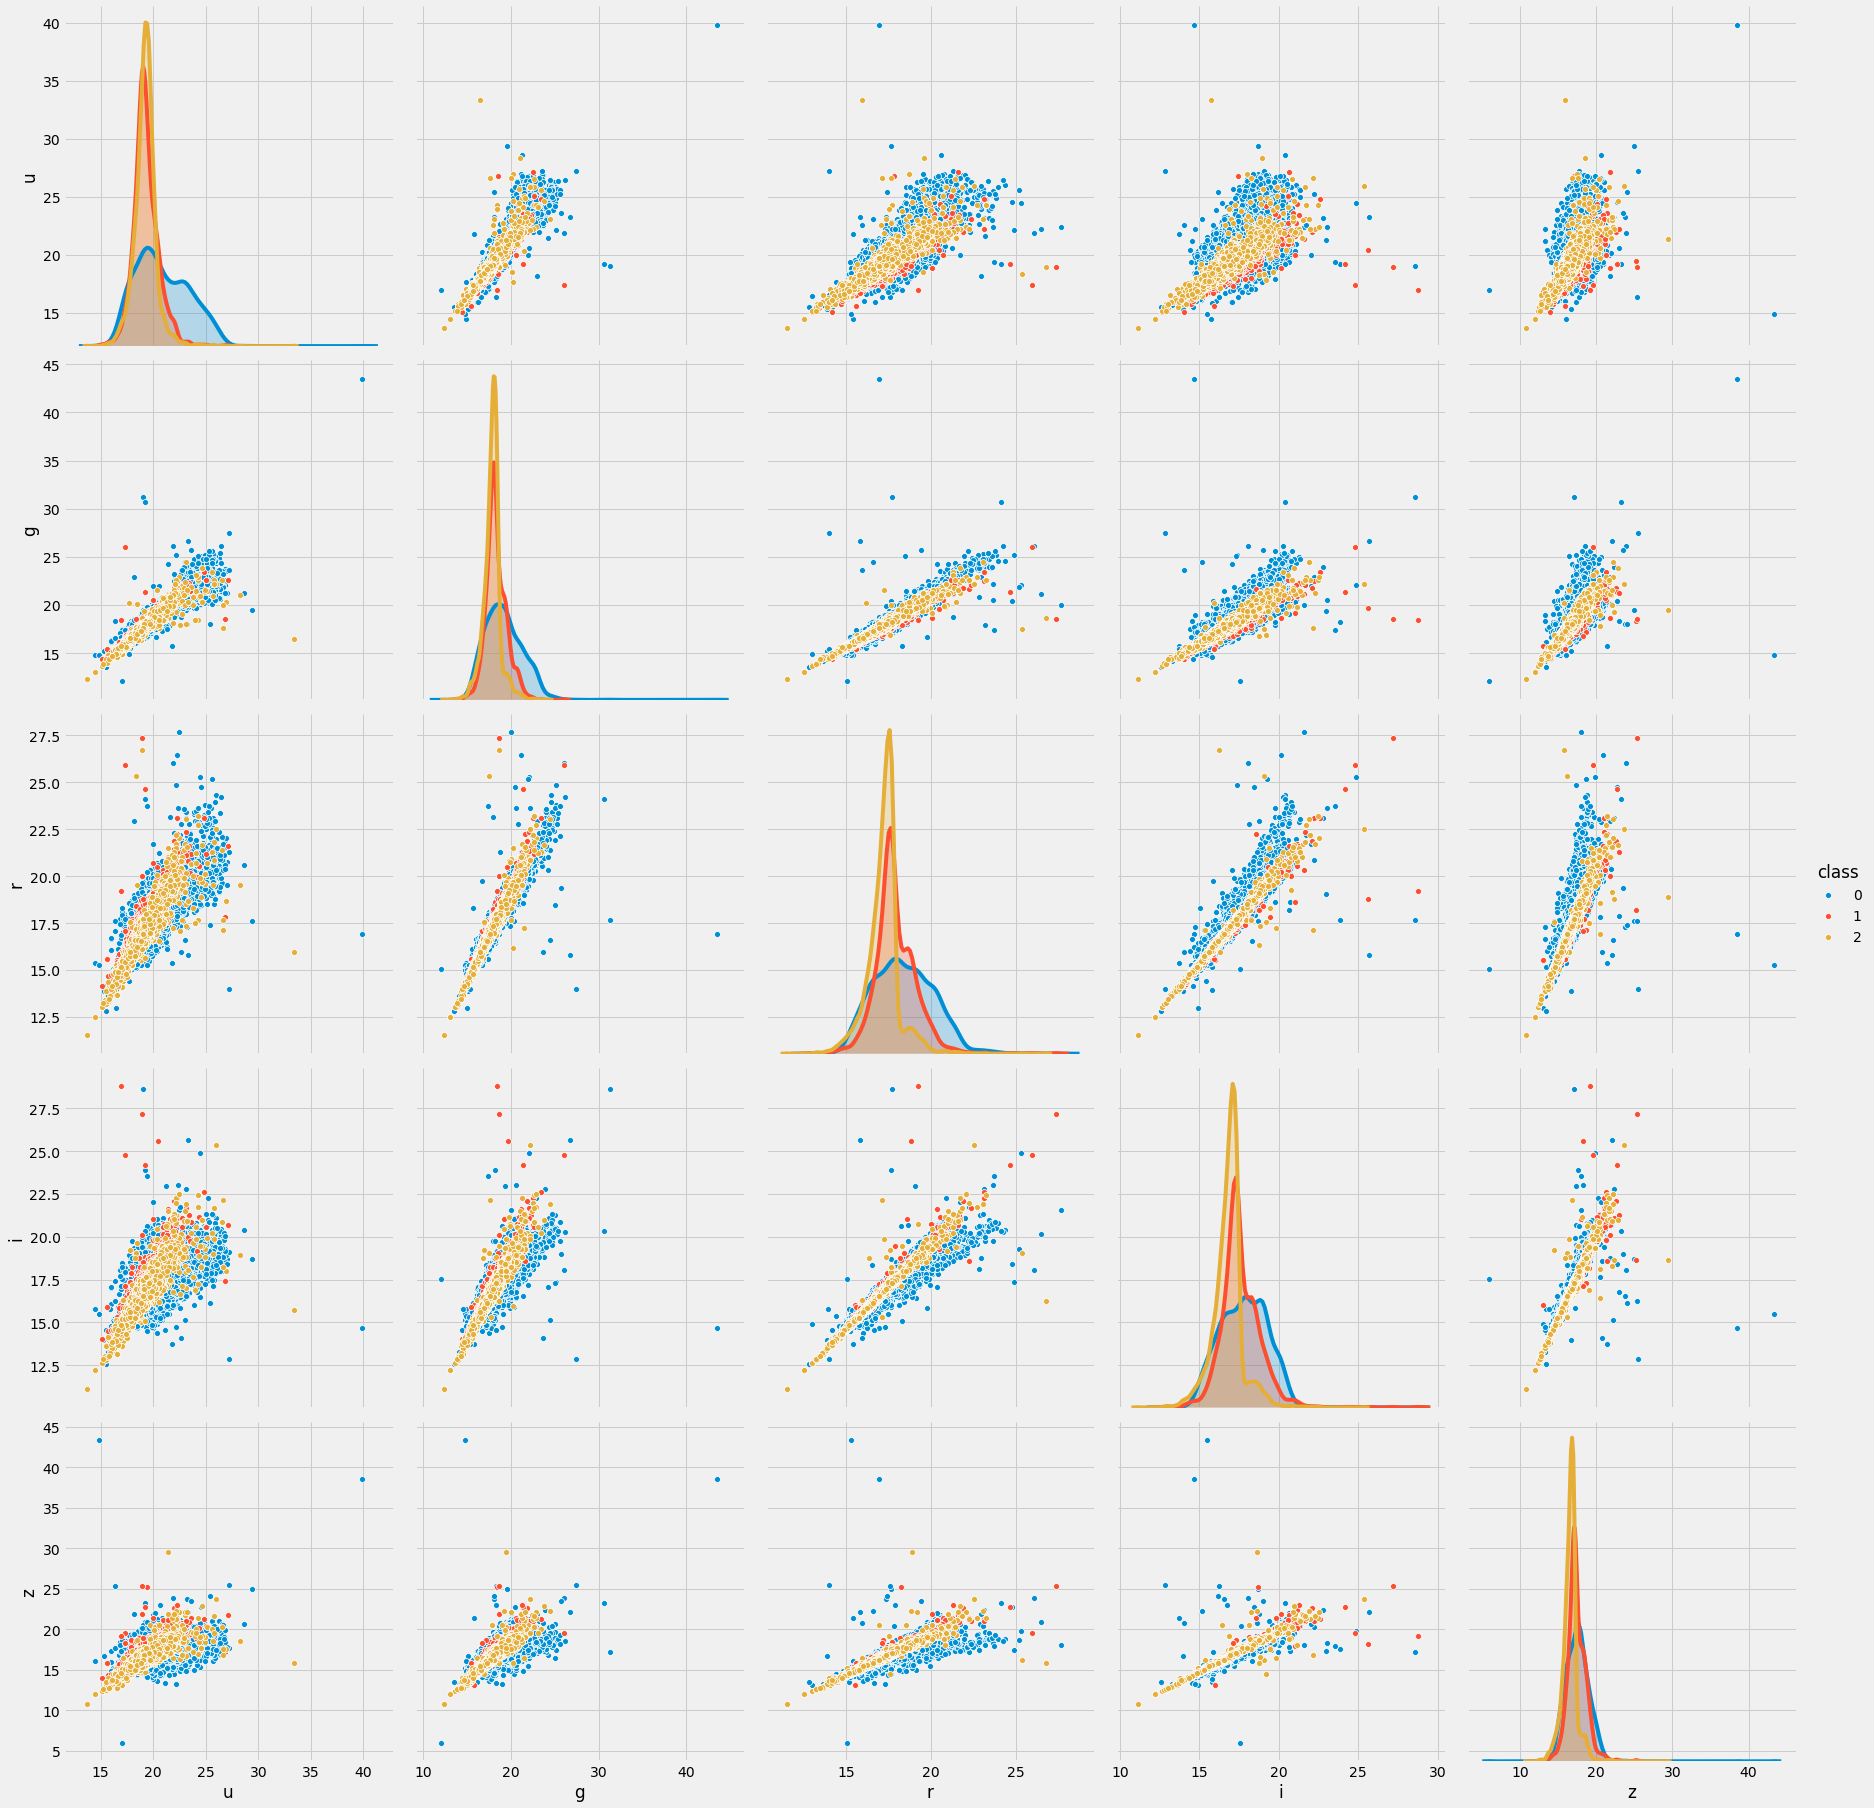

In [185]:
sns.pairplot(data = trn_sample, vars = ['u', 'g', 'r', 'i', 'z'], hue = 'class', size = 5)

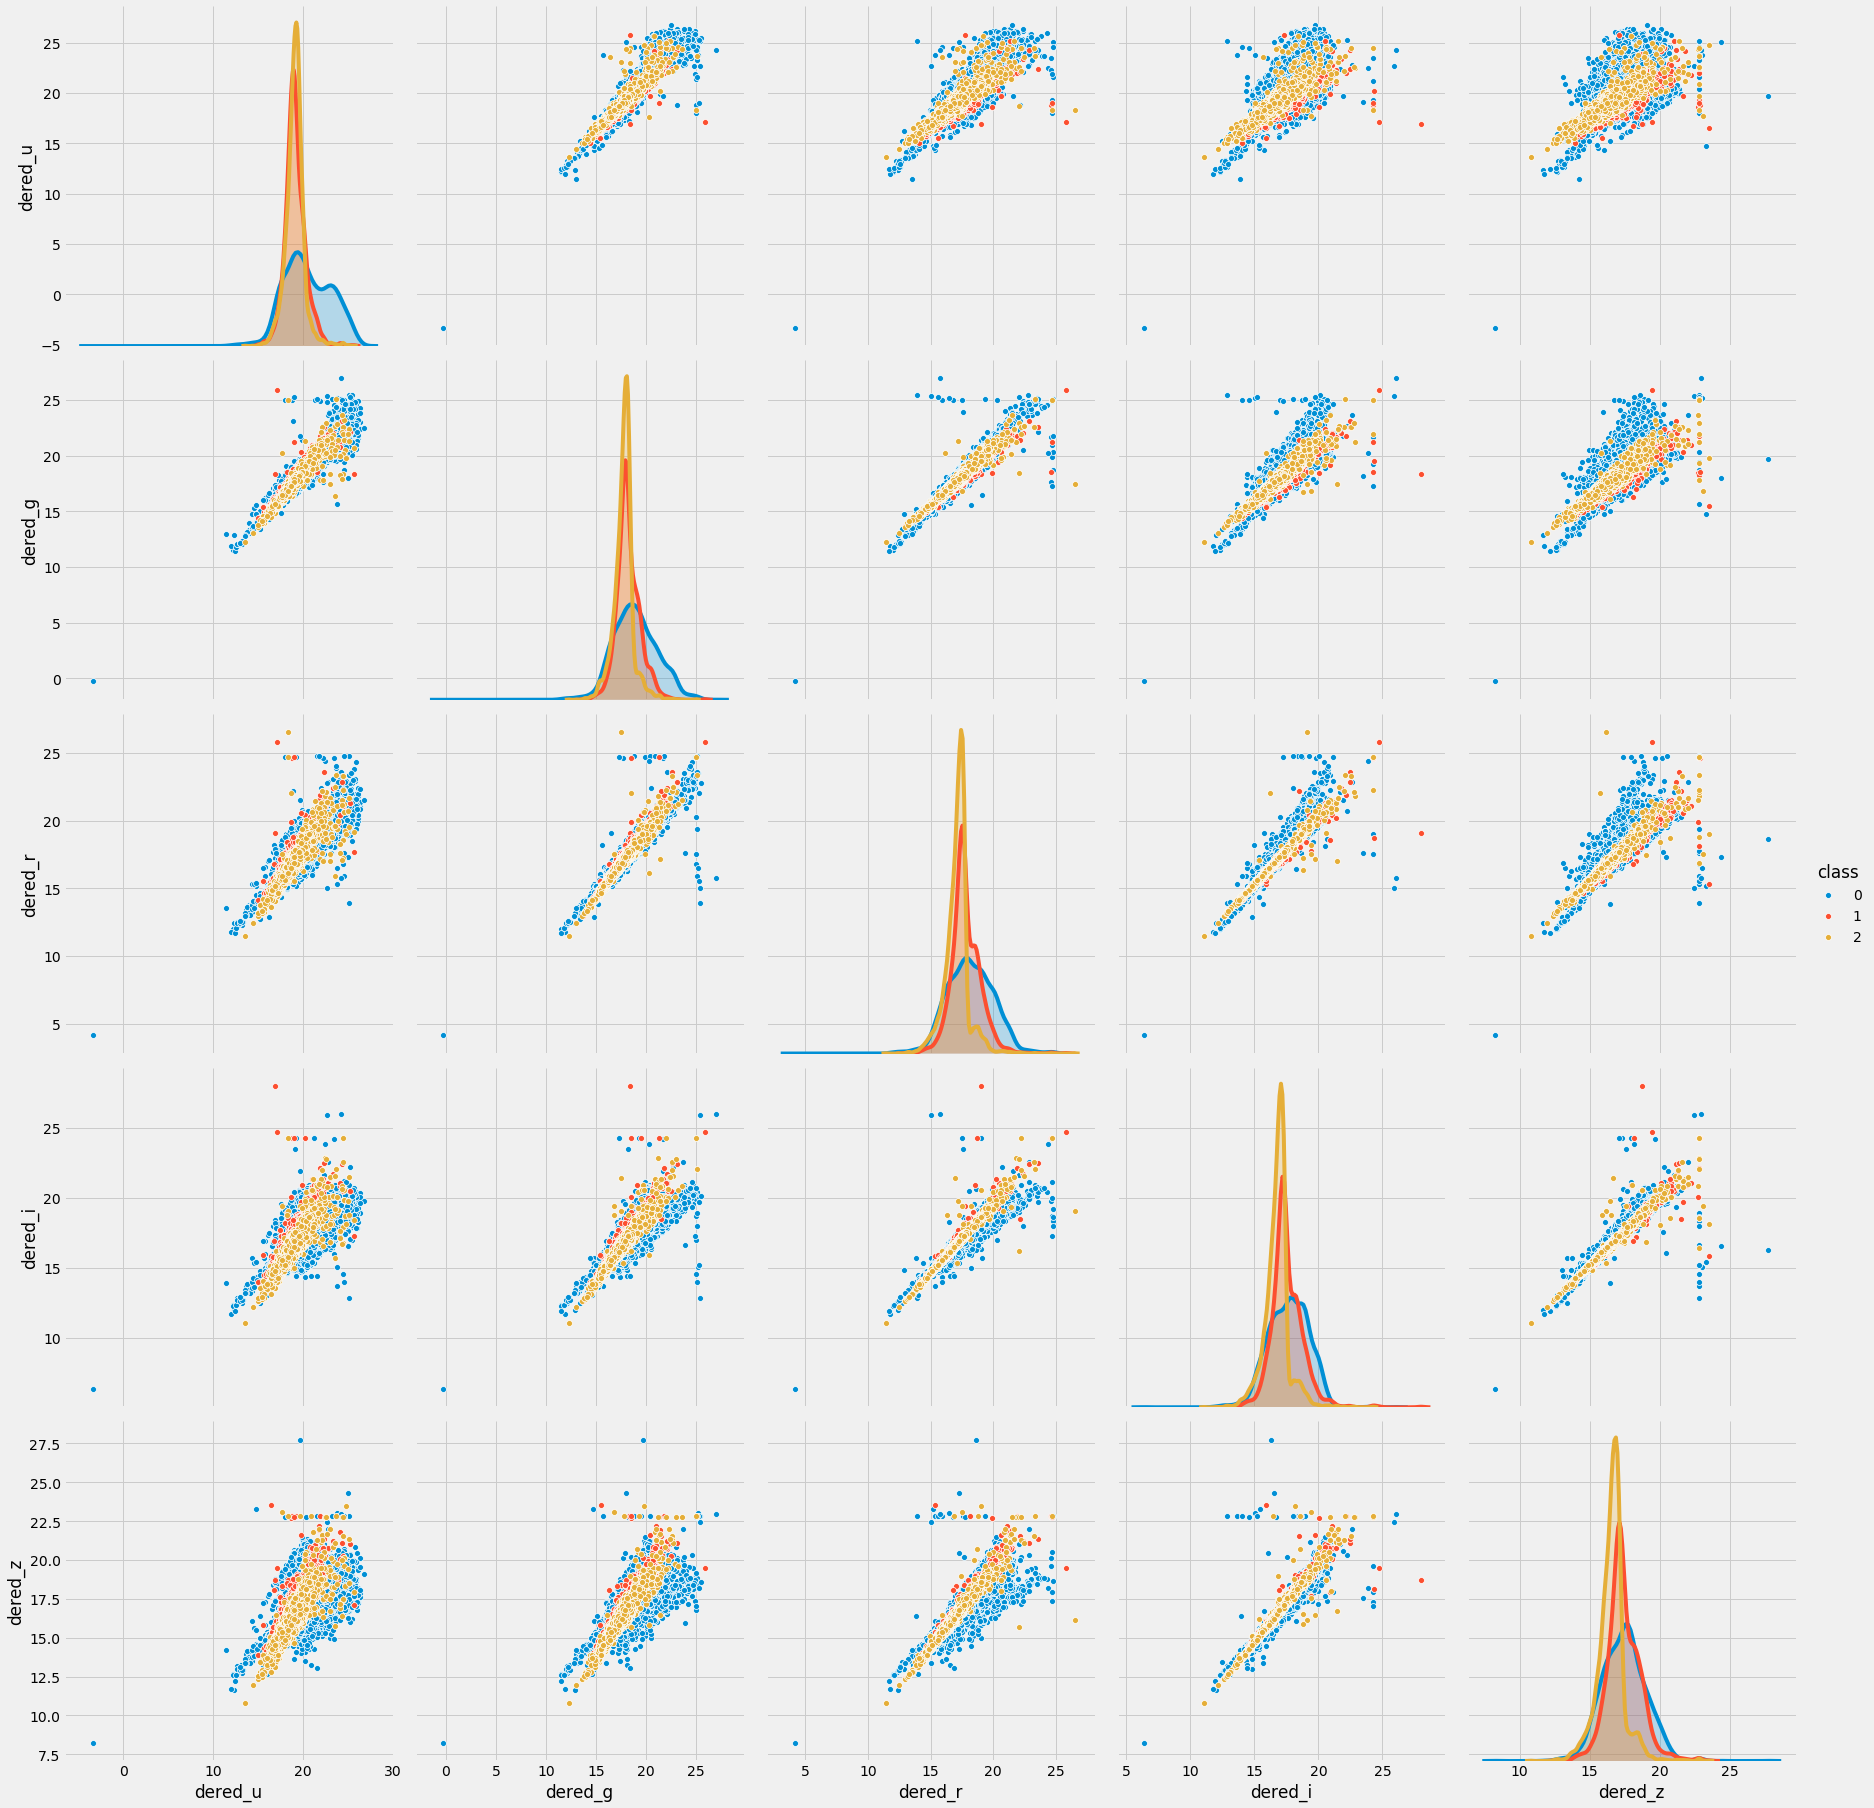

In [186]:
sns.pairplot(data = trn_sample, vars = ['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue = 'class', size = 5)

# airmass column 이 5 개에서는 칼럼들이 거의 일치하다. 
아 이 5개의 칼럼 중에서는 그냥 1개만 킵하고 나머지 4개는 ( airmass_u 만 남기고 다른 것들은 버리자) 이런 것을 알 수 있게 되는 것이다. 

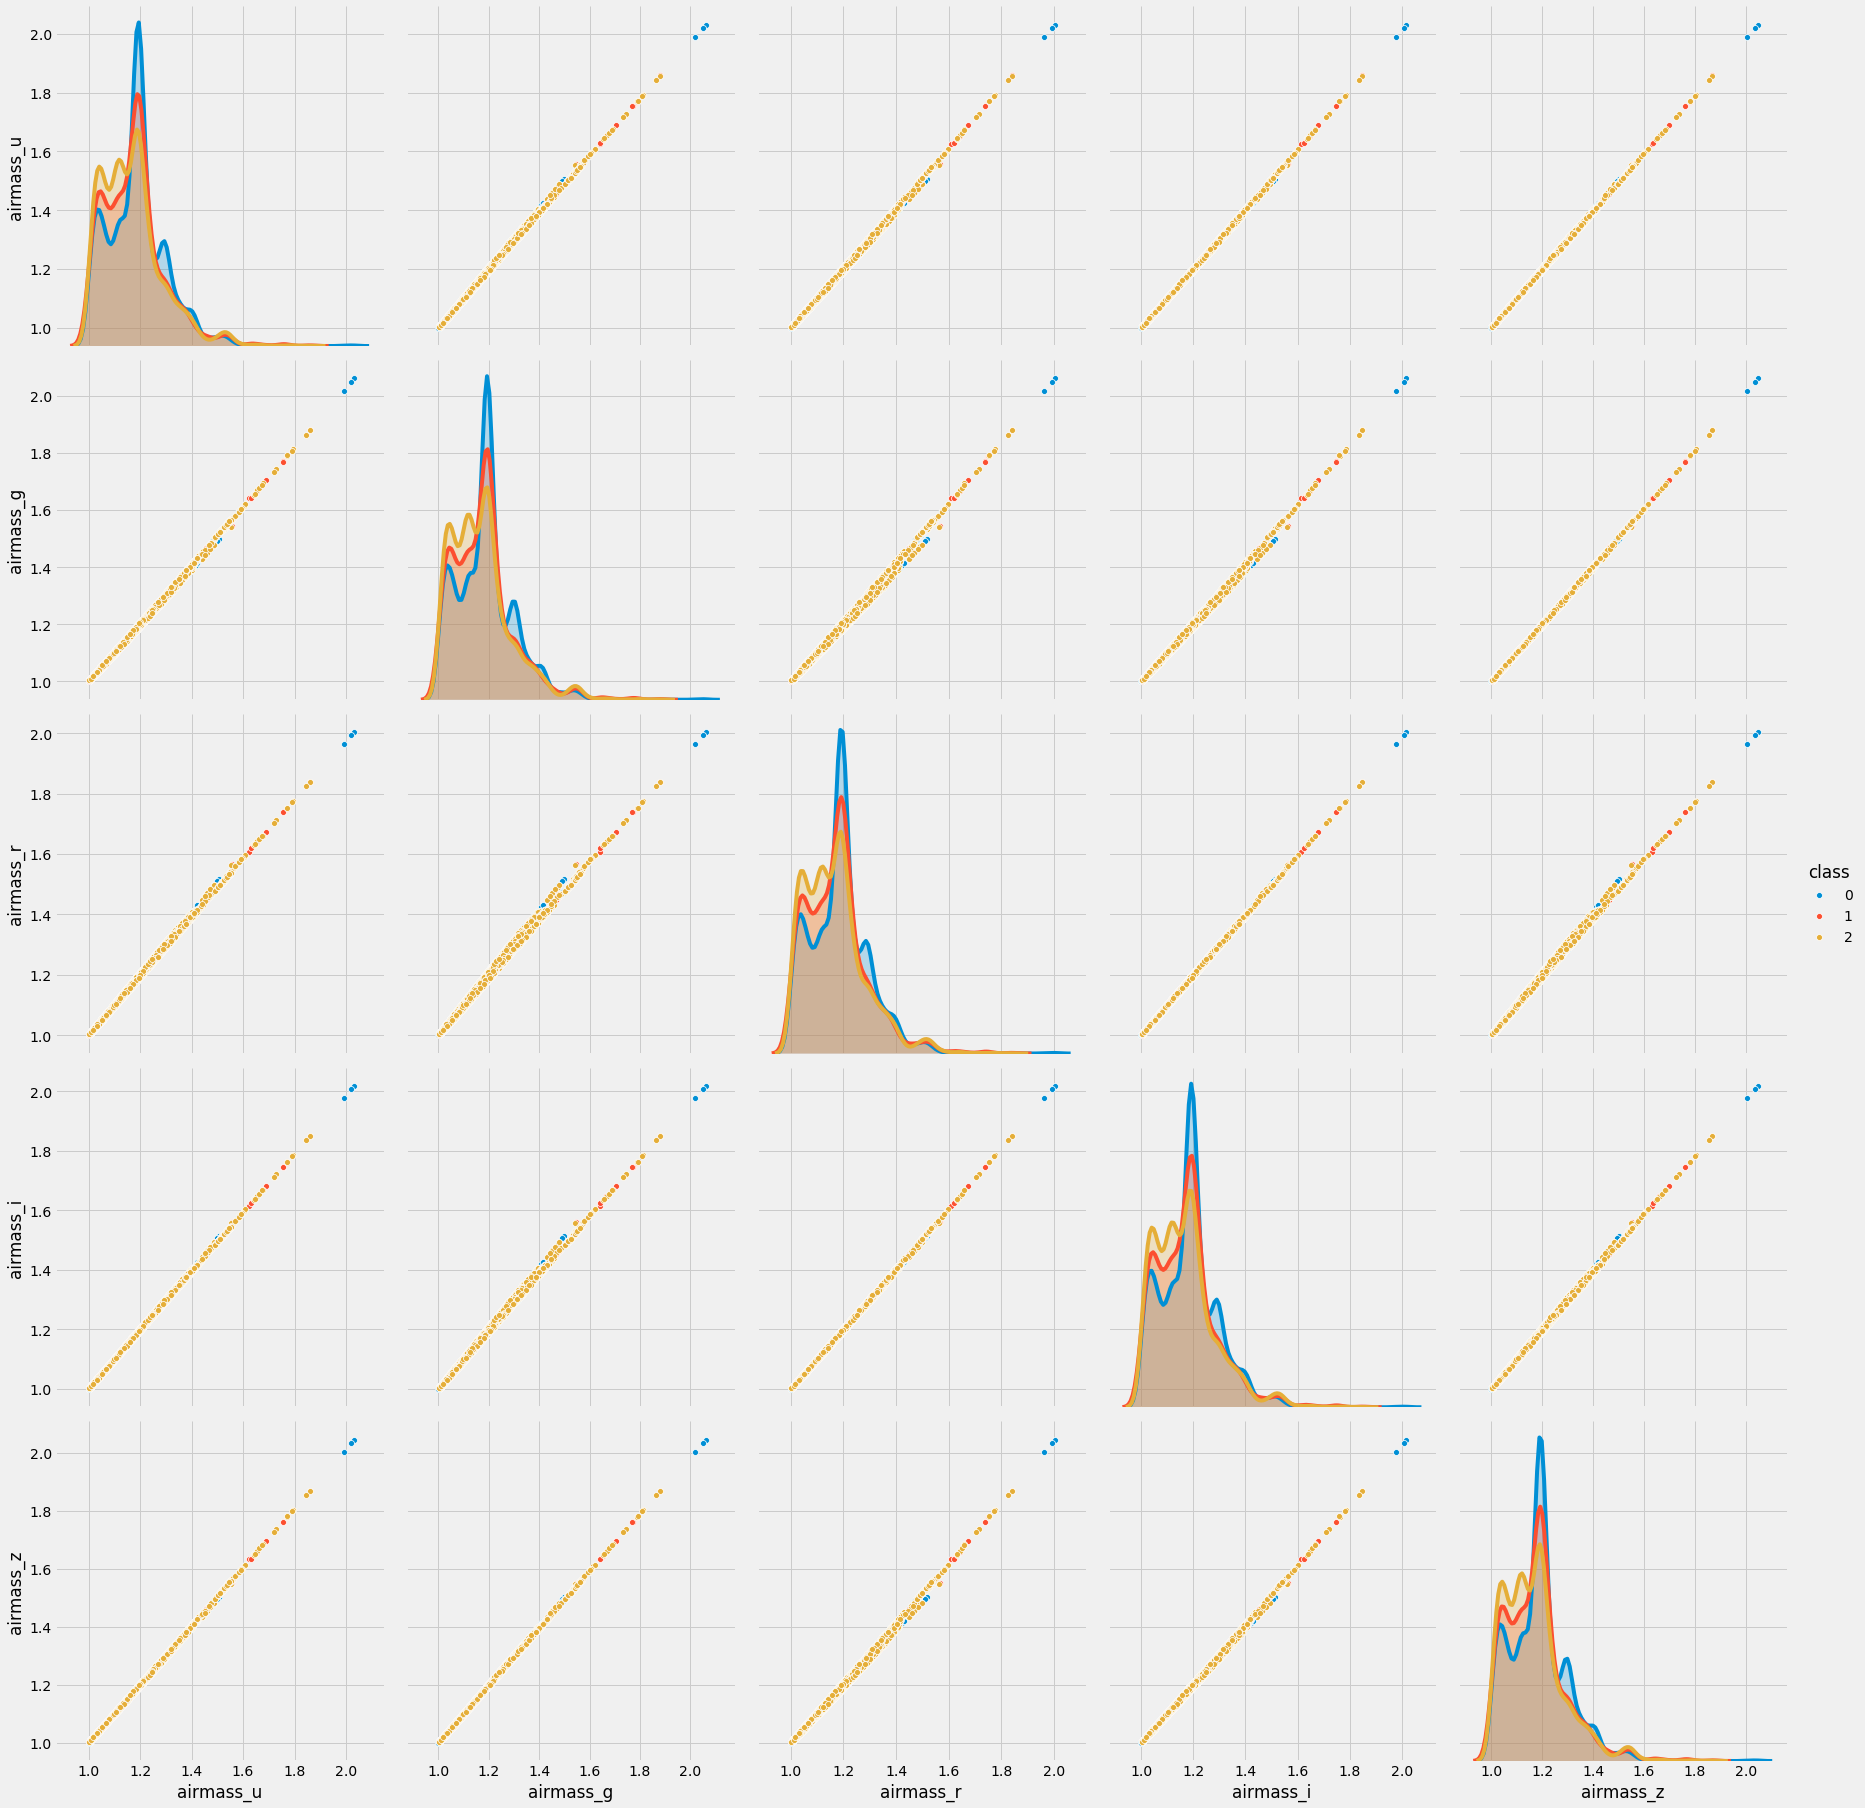

In [187]:
sns.pairplot(data=trn_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)

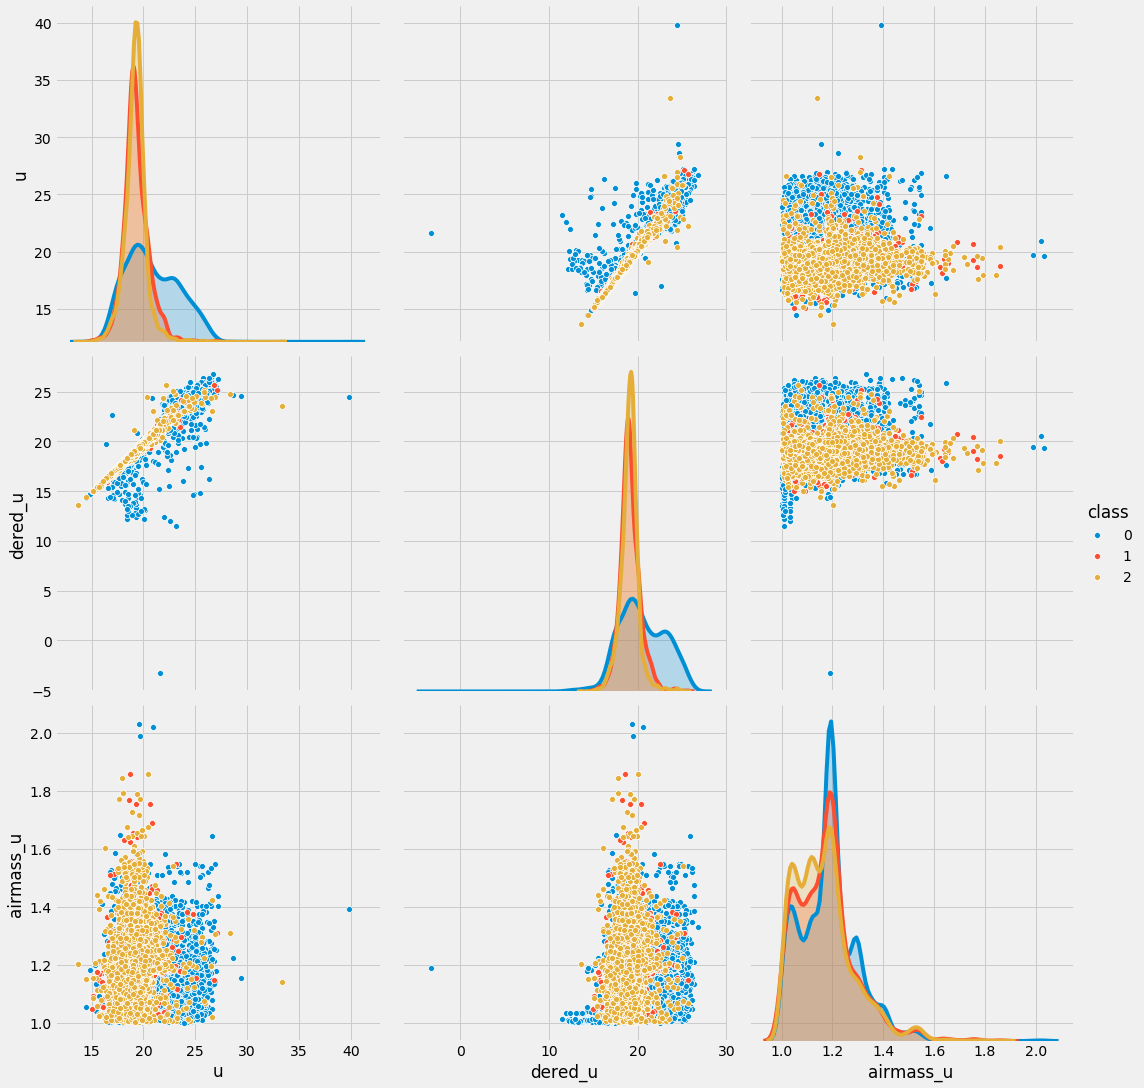

In [188]:
sns.pairplot(data=trn_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

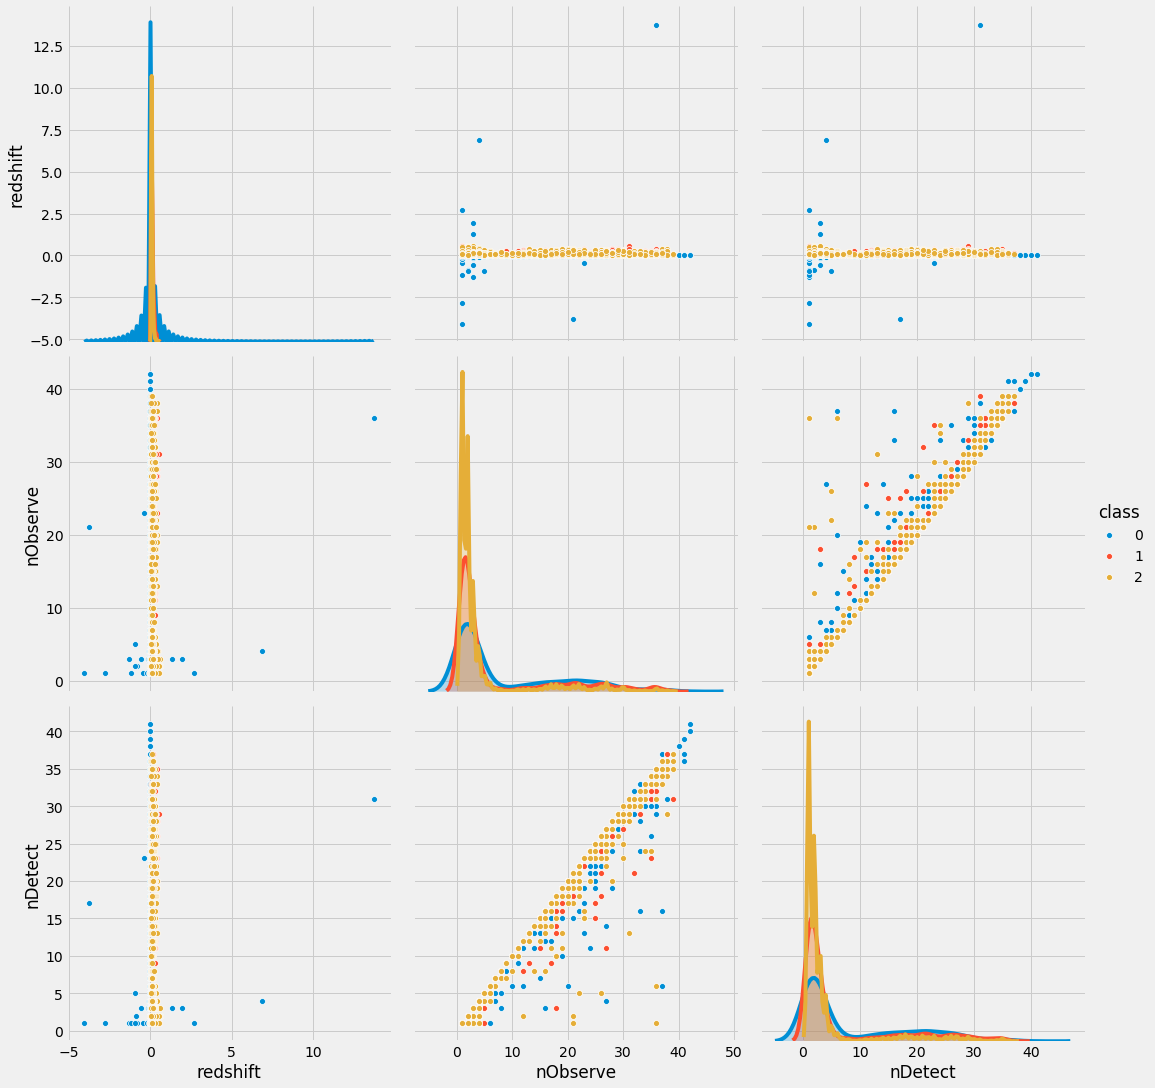

In [189]:
sns.pairplot(data=trn_sample, vars=['redshift', 'nObserve', 'nDetect'], hue='class', size=5)

# trn.groupby('class').mean()
groupby('칼럼 네임') 을 해서 어떤 column 의 이름으로 그룹을 지어서 
어떤 연산을 하겠다 
즉, class column 의 값. 0,1,2 인 샘플들을 그룹으로 다 잡는 것이다. 
mean 을 통해서 평균 값을 다 구할 수 있게 되는 것이다. 
다시 말하자면,
# 0 일 때 U 의 값들의 평균 값은 몇인가 뭐 이런식으로 알 수 있게 되는 것이다. 
어떤 column 을 갖고 한줄으 ㅣ코드로만 구할 수 있는 아주 유용한 것이다. 

In [190]:
trn.groupby('class').mean()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
class,,,,,,,,,,,,,,,,,,
0,20.8648,19.2129,18.3938,17.8377,17.5528,-0.0024,20.5223,18.9474,18.2100,17.7011,17.4511,8.5553,8.3138,1.1864,1.1873,1.1856,1.1860,1.1868
1,19.2710,17.8776,17.8412,17.1333,17.0058,0.1055,19.1071,17.9267,17.7526,17.2447,17.1343,7.0451,6.7588,1.1776,1.1784,1.1770,1.1773,1.1780
2,19.2380,17.8746,17.2048,16.6790,16.3225,0.0918,19.0890,17.7590,17.1243,16.7084,16.3531,4.4425,4.3101,1.1671,1.1678,1.1666,1.1669,1.1674


# trn.groupby('class').mean().T.plot(kind='barh')
왠만한 시각화를 다 할 수 있다. 
groupyclass.mean 을 통해 평균값을 구한 곳에서

T : transpose 행과 열을 바꾸는 거 로 표현을 할 수 있게 되는 것이다. 
kind = barh 바 형식 으로 그리겠다 는 것이다. 

# 그래서 우리가 알 수 있는것은 iarmass_agriz 를 보면 다 똑같다. 즉 airmass a 하나만 알아도 될 거 같다. (5개중 1 하나만!)

# 다른 값들을 보면 class =0 일 때으 ㅣ값이 제일 높구나,
# 2 일 때 평균 값이 낮구나! 이렇게 시각화하면 굉장히 유용하다. 


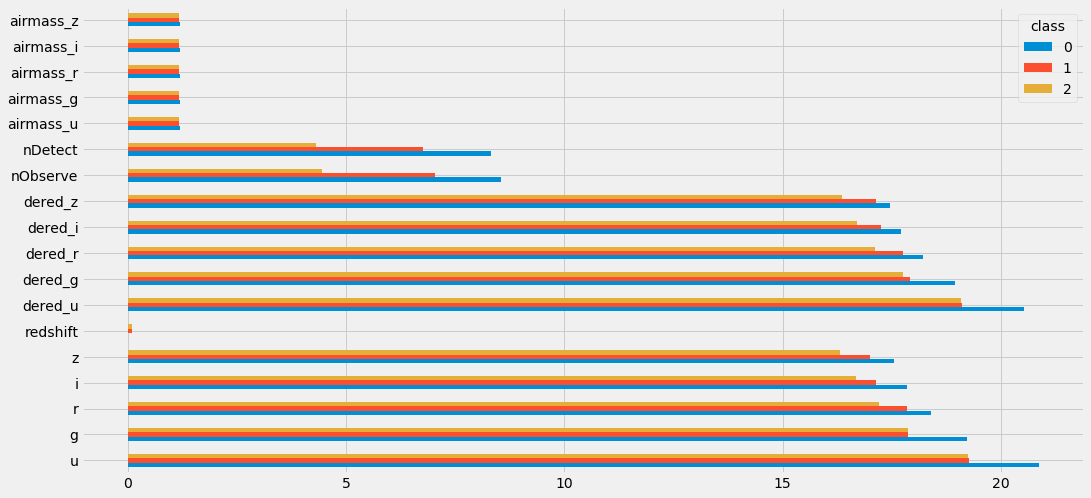

In [191]:
trn.groupby('class').mean().T.plot(kind='barh')

# 3.6 시험 데이터 로드

In [192]:
tst = pd.read_csv(tst_file, index_col = 0)
print(tst.shape)
tst.head()

(80000, 18)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
320000,19.1431,18.0172,17.4733,17.1144,16.9263,1.2130e-01,19.0750,17.9550,17.4308,17.0838,16.9087,1,1,1.1563,1.1515,1.1613,1.1588,1.1539
320001,18.7409,17.1705,16.3691,15.9865,15.7307,-6.6907e-05,15.0703,14.3098,14.3901,14.5160,14.6372,2,2,1.0076,1.0074,1.0080,1.0078,1.0075
320002,19.2980,17.8803,17.2221,16.8096,16.6352,1.1001e-01,19.1004,17.7726,17.1460,16.7497,16.5689,1,1,1.3809,1.3905,1.3715,1.3761,1.3856
320003,18.0775,17.1569,16.9041,16.8118,16.7955,2.9697e-05,17.9729,17.0735,16.8470,16.7700,16.7668,1,1,1.1408,1.1408,1.1409,1.1408,1.1408
320004,17.8325,16.7646,16.2135,15.8722,15.6621,6.8471e-02,17.7545,16.6794,16.1563,15.8315,15.6433,2,2,1.1110,1.1077,1.1145,1.1127,1.1093


# 3.7학습/시험 데이터 결함

# df=pd.concat([trn,tst],axis=0)
test, train data 를 결합 시키겠다 =concat
가로나, 세로로 결합을 할 수 잇다. 
axis 를 통해서 어떤 식으로 결합 할지 결정해 준다. 
위아래로 결합할 때 axis=0
가로로 결합하겠다 axis=1 
이 결합한 데이터를 df 로 만든 것이다. 
# print(df.shape)
test =32000, train=8000 개 였기 때문에 총 데이터의 갯수는 400000개가 되는 것이다. 

# class 값이 NAN (missing value ) 이다. 왜냐? 우리가 예측해야되는 값이기 때문에 nan 값인 것이다. 
이제 대치를 할 것이다. 

In [193]:
df=pd.concat([trn,tst],axis=0)
print(df.shape)
df.tail()

(400000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,NaN
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,NaN
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,NaN
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,NaN
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,NaN


# df.fillna(-1,inplace=True)
class 의 값이 아닌 (0.1.2) 다른 숫자로 일단 대치를 해 놓는 것이다. 

# df.tail()

In [194]:
df.fillna(-1,inplace=True)
df.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,-1.0
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,-1.0
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,-1.0
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,-1.0
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,-1.0


# 3.8 피쳐 변환.

# df['nObserve'].hist(bins=30)
얘를 보게 되면 nobserve 에 대해서 hist 그래프를 그리는 것이다. 
그래프를 보게 되면 
# exponential 한 값을 갖고 있음이 보인다. 이럴 때, log 값을 취해주면 그래프가 좀 죽는다. 


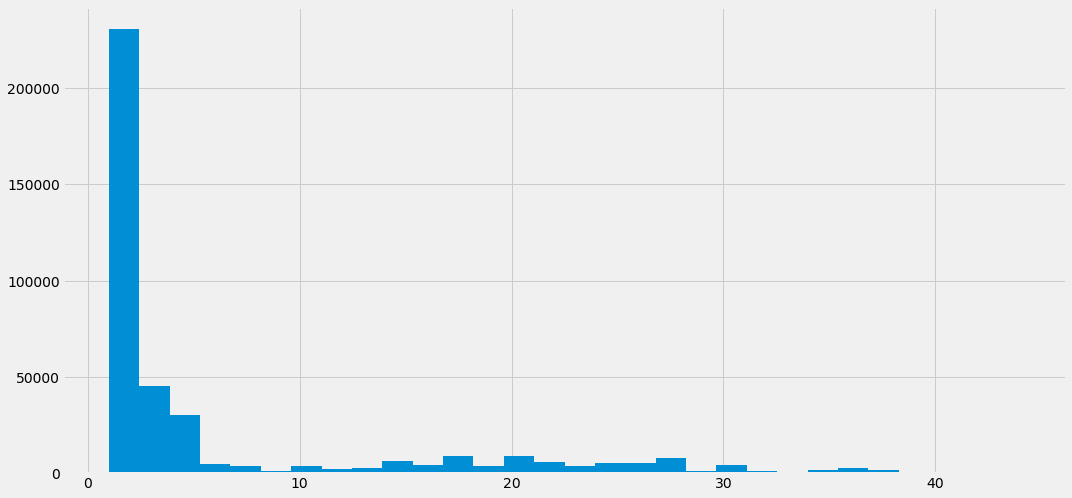

In [195]:
df['nObserve'].hist(bins=30)

# df['nObserve']=df['nObserve'].apply(np.log1p)
apply(np,log1p) 를 통해서 로그를 씌우게 된다. 
# log1p 라는 것은 그냥 로그를 취하는 것이 아니라 +1 을 한 뒤에 로그를 하는 것이다. 왜냐하면 0 의 값에 로그를 취하면 무한대가 되기 때문에... 즉 무한대 값이 안나오게 하기 위해서 1p 라는 함수를 사용하는 것이다. 전체적으로 적용하겠다. 
# 전에는 최대값이 40 정도 되었는데 이제 최대값이 1.5 정도로 변경  되었다. 
log 뿐만이 아니라 다른 함수들도 적용할 수 있다. 
# 어떤 column 전체에 적용시킬 수 있을 때 apply 를 사용하면 편리하다. 

In [196]:
df['nObserve']=df['nObserve'].apply(np.log1p)

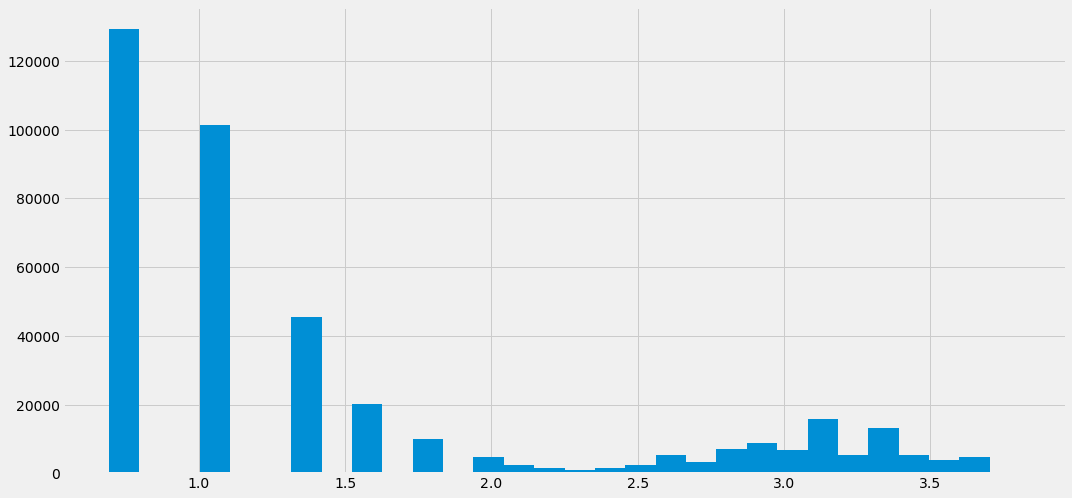

In [197]:
df['nObserve'].hist(bins=30)

# 3.9 피쳐 생성.
사칙 연산도 가능하다. 각 칼럼에 대해서 
dered_u -u 의 값을 새로운 칼럼에 저장 하게다! 
전에는 class column 이 마지막이지만 이제 더 추가된 칼럼들이 존재 하게 되는 것이다. 

In [198]:
df['d_dered_u'] = df['dered_u'] - df['u']
df['d_dered_g'] = df['dered_g'] - df['g']
df['d_dered_r'] = df['dered_r'] - df['r']
df['d_dered_i'] = df['dered_i'] - df['i']
df['d_dered_z'] = df['dered_z'] - df['z']
df['d_dered_rg'] = df['dered_r'] - df['dered_g']
df['d_dered_ig'] = df['dered_i'] - df['dered_g']
df['d_dered_zg'] = df['dered_z'] - df['dered_g']
df['d_dered_ri'] = df['dered_r'] - df['dered_i']
df['d_dered_rz'] = df['dered_r'] - df['dered_z']
df['d_dered_iz'] = df['dered_i'] - df['dered_z']
df['d_obs_det'] = df['nObserve'] - df['nDetect']

print(df.shape)
df.head()

(400000, 31)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,18,1.1898,1.1907,1.1890,1.1894,1.1902,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-1.3027,-2.6257,-3.3488,1.3230,2.0462,0.7232,-15.0556
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1,1.2533,1.2578,1.2488,1.2510,1.2555,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.5931,-0.7683,-0.8698,0.1751,0.2767,0.1016,-0.3069
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,2,1.0225,1.0241,1.0210,1.0217,1.0233,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.2466,-0.3649,-0.3905,0.1183,0.1440,0.0257,-0.9014
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,3,1.2054,1.2061,1.2049,1.2051,1.2057,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-0.9074,-1.2000,-1.4395,0.2926,0.5321,0.2395,-1.3906
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,12,1.1939,1.1943,1.1937,1.1938,1.1941,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-1.5709,-2.2436,-2.5579,0.6727,0.9871,0.3144,-9.3609


# 3.10 피쳐 삭제 
위에 있는 값들을 다 사용하는 것이 아니기 때문이다. 
어떤 feature 들이 쓸모 없냐? 
# 중복 되는 값들이 쓸모 없는 값이다. 
# 그것을 알아 보기 위해서 상관계수 를 알아 보기 위해서 
# df.corr//correlation 을 통해서 확인이 가능하다.  
가장 높은 값인 1 은 짙은 색으로 점점 여리게~
# 상관 계수가 뭐가 제일 높은지 알수 있다. 
예르르 들면 g, dered_g/// u, dered_u 뭐 이런거. 이럴 땐, 
# g, dered_g 둘중에 하나만 사용해도 되겠다. 고 생각하면 되는 것이다. 
# airmassU~Z 까지 거의 1 로 동일한 값을 갖는다. 즉, airmass 5개 중에서 하나만 살려서 사용하자. 
이렇게 상관관계를 통해서 뭐가 연관성이 높아서 삭제해도 되는지 안되는지를 확인할 수 잇게 되는 것이다. 

In [199]:
df.corr().style.background_gradient()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
u,1.0000,0.0543,0.8159,0.0194,0.0145,-0.0085,0.9347,0.0904,0.7810,0.0389,0.0231,0.2398,0.2211,0.0768,0.0765,0.0769,0.0768,0.0767,-0.2378,-0.2140,-0.0061,-0.1284,-0.0016,0.0016,-0.0182,-0.0357,-0.0196,0.0124,0.0094,0.0020,-0.2174
g,0.0543,1.0000,0.0556,0.5913,0.5315,-0.0003,0.0525,0.9987,0.0538,0.7074,0.4478,0.0130,0.0127,0.0027,0.0027,0.0028,0.0027,0.0027,-0.0142,-0.0069,-0.9977,-0.0063,-0.4753,-0.3233,-0.9986,-0.0021,-0.0011,-0.7049,-0.4458,0.0001,-0.0126
r,0.8159,0.0556,1.0000,0.0256,0.0199,-0.0055,0.8037,0.0953,0.9684,0.0530,0.0330,0.2171,0.1954,0.0772,0.0768,0.0774,0.0773,0.0770,-0.2346,-0.0620,-0.0025,-0.1127,-0.0005,0.0036,-0.0057,-0.0207,-0.0110,0.0106,0.0073,0.0007,-0.1915
i,0.0194,0.5913,0.0256,1.0000,0.8991,-0.0001,0.0195,0.5901,0.0252,0.9878,0.6254,0.0054,0.0061,-0.0002,-0.0003,-0.0001,-0.0002,-0.0002,-0.0079,-0.0005,-0.5904,-0.0010,-0.9903,-0.6738,-0.5907,0.8047,0.4028,-0.9876,-0.6247,0.0000,-0.0061
z,0.0145,0.5315,0.0199,0.8991,1.0000,-0.0002,0.0144,0.5303,0.0196,0.8881,0.7096,0.0042,0.0053,-0.0002,-0.0002,-0.0001,-0.0002,-0.0002,-0.0083,-0.0009,-0.5309,-0.0007,-0.8904,-0.7360,-0.5311,0.7237,0.5270,-0.8881,-0.7092,-0.1904,-0.0054
redshift,-0.0085,-0.0003,-0.0055,-0.0001,-0.0002,1.0000,-0.0080,-0.0002,-0.0028,-0.0001,-0.0001,-0.0092,-0.0067,0.0011,0.0011,0.0011,0.0011,0.0011,0.0484,0.0016,0.0005,0.0106,0.0002,0.0001,-0.0001,0.0001,-0.0000,-0.0001,-0.0000,0.0001,0.0064
dered_u,0.9347,0.0525,0.8037,0.0195,0.0144,-0.0080,1.0000,0.0969,0.8392,0.0423,0.0249,0.2337,0.2172,0.0889,0.0885,0.0892,0.0891,0.0887,-0.2120,0.1470,0.0068,0.1521,0.0013,0.0036,-0.0194,-0.0374,-0.0209,0.0128,0.0100,0.0025,-0.2138
dered_g,0.0904,0.9987,0.0953,0.5901,0.5303,-0.0002,0.0969,1.0000,0.0990,0.7072,0.4476,0.0222,0.0212,0.0071,0.0070,0.0072,0.0071,0.0070,-0.0219,0.0149,-0.9928,0.0158,-0.4733,-0.3218,-0.9957,-0.0037,-0.0020,-0.7018,-0.4437,0.0002,-0.0209
dered_r,0.7810,0.0538,0.9684,0.0252,0.0196,-0.0028,0.8392,0.0990,1.0000,0.0549,0.0340,0.2100,0.1899,0.0848,0.0843,0.0852,0.0850,0.0845,-0.2139,0.1329,0.0065,0.1388,0.0018,0.0048,-0.0065,-0.0217,-0.0117,0.0108,0.0076,0.0010,-0.1863
dered_i,0.0389,0.7074,0.0530,0.9878,0.8881,-0.0001,0.0423,0.7072,0.0549,1.0000,0.6331,0.0118,0.0119,0.0026,0.0026,0.0027,0.0027,0.0026,-0.0136,0.0080,-0.7048,0.0082,-0.9566,-0.6508,-0.7056,0.7044,0.3526,-0.9978,-0.6312,0.0000,-0.0119


# df.drop 을 통해서 삭제하고자 하는 column 들을 적어서 내면 삭제가 되는 것이다. 
# axis=1 은column 을 삭제하고 싶다! 를 명시 하는 것
# inplace=True 는 이 데이터 프레임 내에서 다른 변수를 생성하지 않고, 이 데이터 프레임 자체를 수정하겠다. df 라는 데이터 프레임에 새로운 변수에 할당 하는것이 아니라. df 안에다가 그대로 삭제하겠다! 라는 것이다. 
# 삭제 전에는 총 32 개의 칼럼이 있었는데 이젠 20 개의 칼럼만 남는 것을 확인 할수 잇따. 

In [200]:
df.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect', 'd_dered_rg', 'd_dered_ri'],axis=1, inplace=True)
print(df.shape)
df.head()

(400000, 20)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,-15.0556
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,-0.3069
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,-0.9014
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,-1.3906
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,-9.3609


# 3.11 새로운 학습 데이터 파일 생성.
# To _csv 로 하면 파일로 저장 할 수 있게 된다 (파일 경로 지정해주면)
위 에있는 feature 를 그대로 저장시켜준다

In [201]:
df.to_csv(feature_file)

In [202]:
!ls -alF ./Dacon/

total 449712
drwxr-xr-x  7 jae-wook.lee  staff        224 Sep 11 01:53 ./
drwxr-xr-x  8 jae-wook.lee  staff        256 Sep 11 02:00 ../
-rw-r--r--@ 1 jae-wook.lee  staff       6148 Sep 10 14:33 .DS_Store
-rw-r--r--  1 jae-wook.lee  staff  132588144 Sep 11 02:00 feature.csv
-rw-r--r--@ 1 jae-wook.lee  staff     800010 Jul 26 04:35 sample_submission.csv
-rw-r--r--@ 1 jae-wook.lee  staff   18936246 Jul 26 04:35 test.csv
-rw-r--r--@ 1 jae-wook.lee  staff   76278443 Jul 26 04:35 train.csv


# 저장한 데이터를 읽어 올수 있는지 확인을 다시 해보자. 


In [203]:
feature =pd.read_csv(feature_file)
print(feature.shape)
feature.head()

(400000, 21)


,id,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
0,0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,-15.0556
1,1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,-0.3069
2,2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,-0.9014
3,3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,-1.3906
4,4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,-9.3609


In [204]:
feature.corr().style.background_gradient()

,id,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
id,1.0000,0.0023,0.0014,0.0010,0.0005,0.0016,0.0013,0.0011,0.0006,-0.0010,-0.4952,-0.0010,-0.0004,-0.0005,-0.0013,-0.0022,0.0012,0.0009,-0.0010,-0.0004,-0.0000
z,0.0023,1.0000,-0.0002,0.0144,0.5303,0.0196,0.8881,0.7096,0.0042,-0.0002,-0.0083,-0.0009,-0.5309,-0.0007,-0.8904,-0.7360,0.7237,0.5270,-0.7092,-0.1904,-0.0054
redshift,0.0014,-0.0002,1.0000,-0.0080,-0.0002,-0.0028,-0.0001,-0.0001,-0.0092,0.0011,0.0484,0.0016,0.0005,0.0106,0.0002,0.0001,0.0001,-0.0000,-0.0000,0.0001,0.0064
dered_u,0.0010,0.0144,-0.0080,1.0000,0.0969,0.8392,0.0423,0.0249,0.2337,0.0889,-0.2120,0.1470,0.0068,0.1521,0.0013,0.0036,-0.0374,-0.0209,0.0100,0.0025,-0.2138
dered_g,0.0005,0.5303,-0.0002,0.0969,1.0000,0.0990,0.7072,0.4476,0.0222,0.0071,-0.0219,0.0149,-0.9928,0.0158,-0.4733,-0.3218,-0.0037,-0.0020,-0.4437,0.0002,-0.0209
dered_r,0.0016,0.0196,-0.0028,0.8392,0.0990,1.0000,0.0549,0.0340,0.2100,0.0848,-0.2139,0.1329,0.0065,0.1388,0.0018,0.0048,-0.0217,-0.0117,0.0076,0.0010,-0.1863
dered_i,0.0013,0.8881,-0.0001,0.0423,0.7072,0.0549,1.0000,0.6331,0.0118,0.0026,-0.0136,0.0080,-0.7048,0.0082,-0.9566,-0.6508,0.7044,0.3526,-0.6312,0.0000,-0.0119
dered_z,0.0011,0.7096,-0.0001,0.0249,0.4476,0.0340,0.6331,1.0000,0.0075,-0.0010,-0.0090,0.0042,-0.4463,0.0043,-0.6057,-0.0452,0.4461,0.8933,-0.9991,-0.7740,-0.0081
nObserve,0.0006,0.0042,-0.0092,0.2337,0.0222,0.2100,0.0118,0.0075,1.0000,0.2507,-0.1489,-0.0249,-0.0006,-0.0253,0.0004,0.0013,-0.0055,-0.0028,0.0012,-0.0000,-0.9363
airmass_u,-0.0010,-0.0002,0.0011,0.0889,0.0071,0.0848,0.0026,-0.0010,0.2507,1.0000,-0.0483,0.0308,0.0031,0.0313,0.0028,-0.0008,-0.0034,-0.0047,0.0046,0.0035,-0.2482
